In [16]:
import pandas as pd

plain = pd.read_csv("plain.csv")
unroll2 = pd.read_csv("unroll2.csv")
unroll4 = pd.read_csv("unroll4.csv")
df = plain
df.rename(columns={"time": "plain"}, inplace=True)
df["plain"] = df["plain"] * 1e6
df["unroll2"] = unroll2["time"] * 1e6
df["unroll4"] = unroll4["time"] * 1e6
df

,elements,plain,unroll2,unroll4
0,128,6.40066,6.05886,6.71774
1,256,8.19112,7.41744,8.36120
2,512,11.26470,9.89620,10.93750
3,1024,18.65340,15.60590,17.54190
4,2048,31.34150,25.20450,31.00870
5,4096,58.60910,45.62960,55.47840
6,8192,110.98300,90.83150,106.55700
7,16384,220.74600,168.76400,213.85100


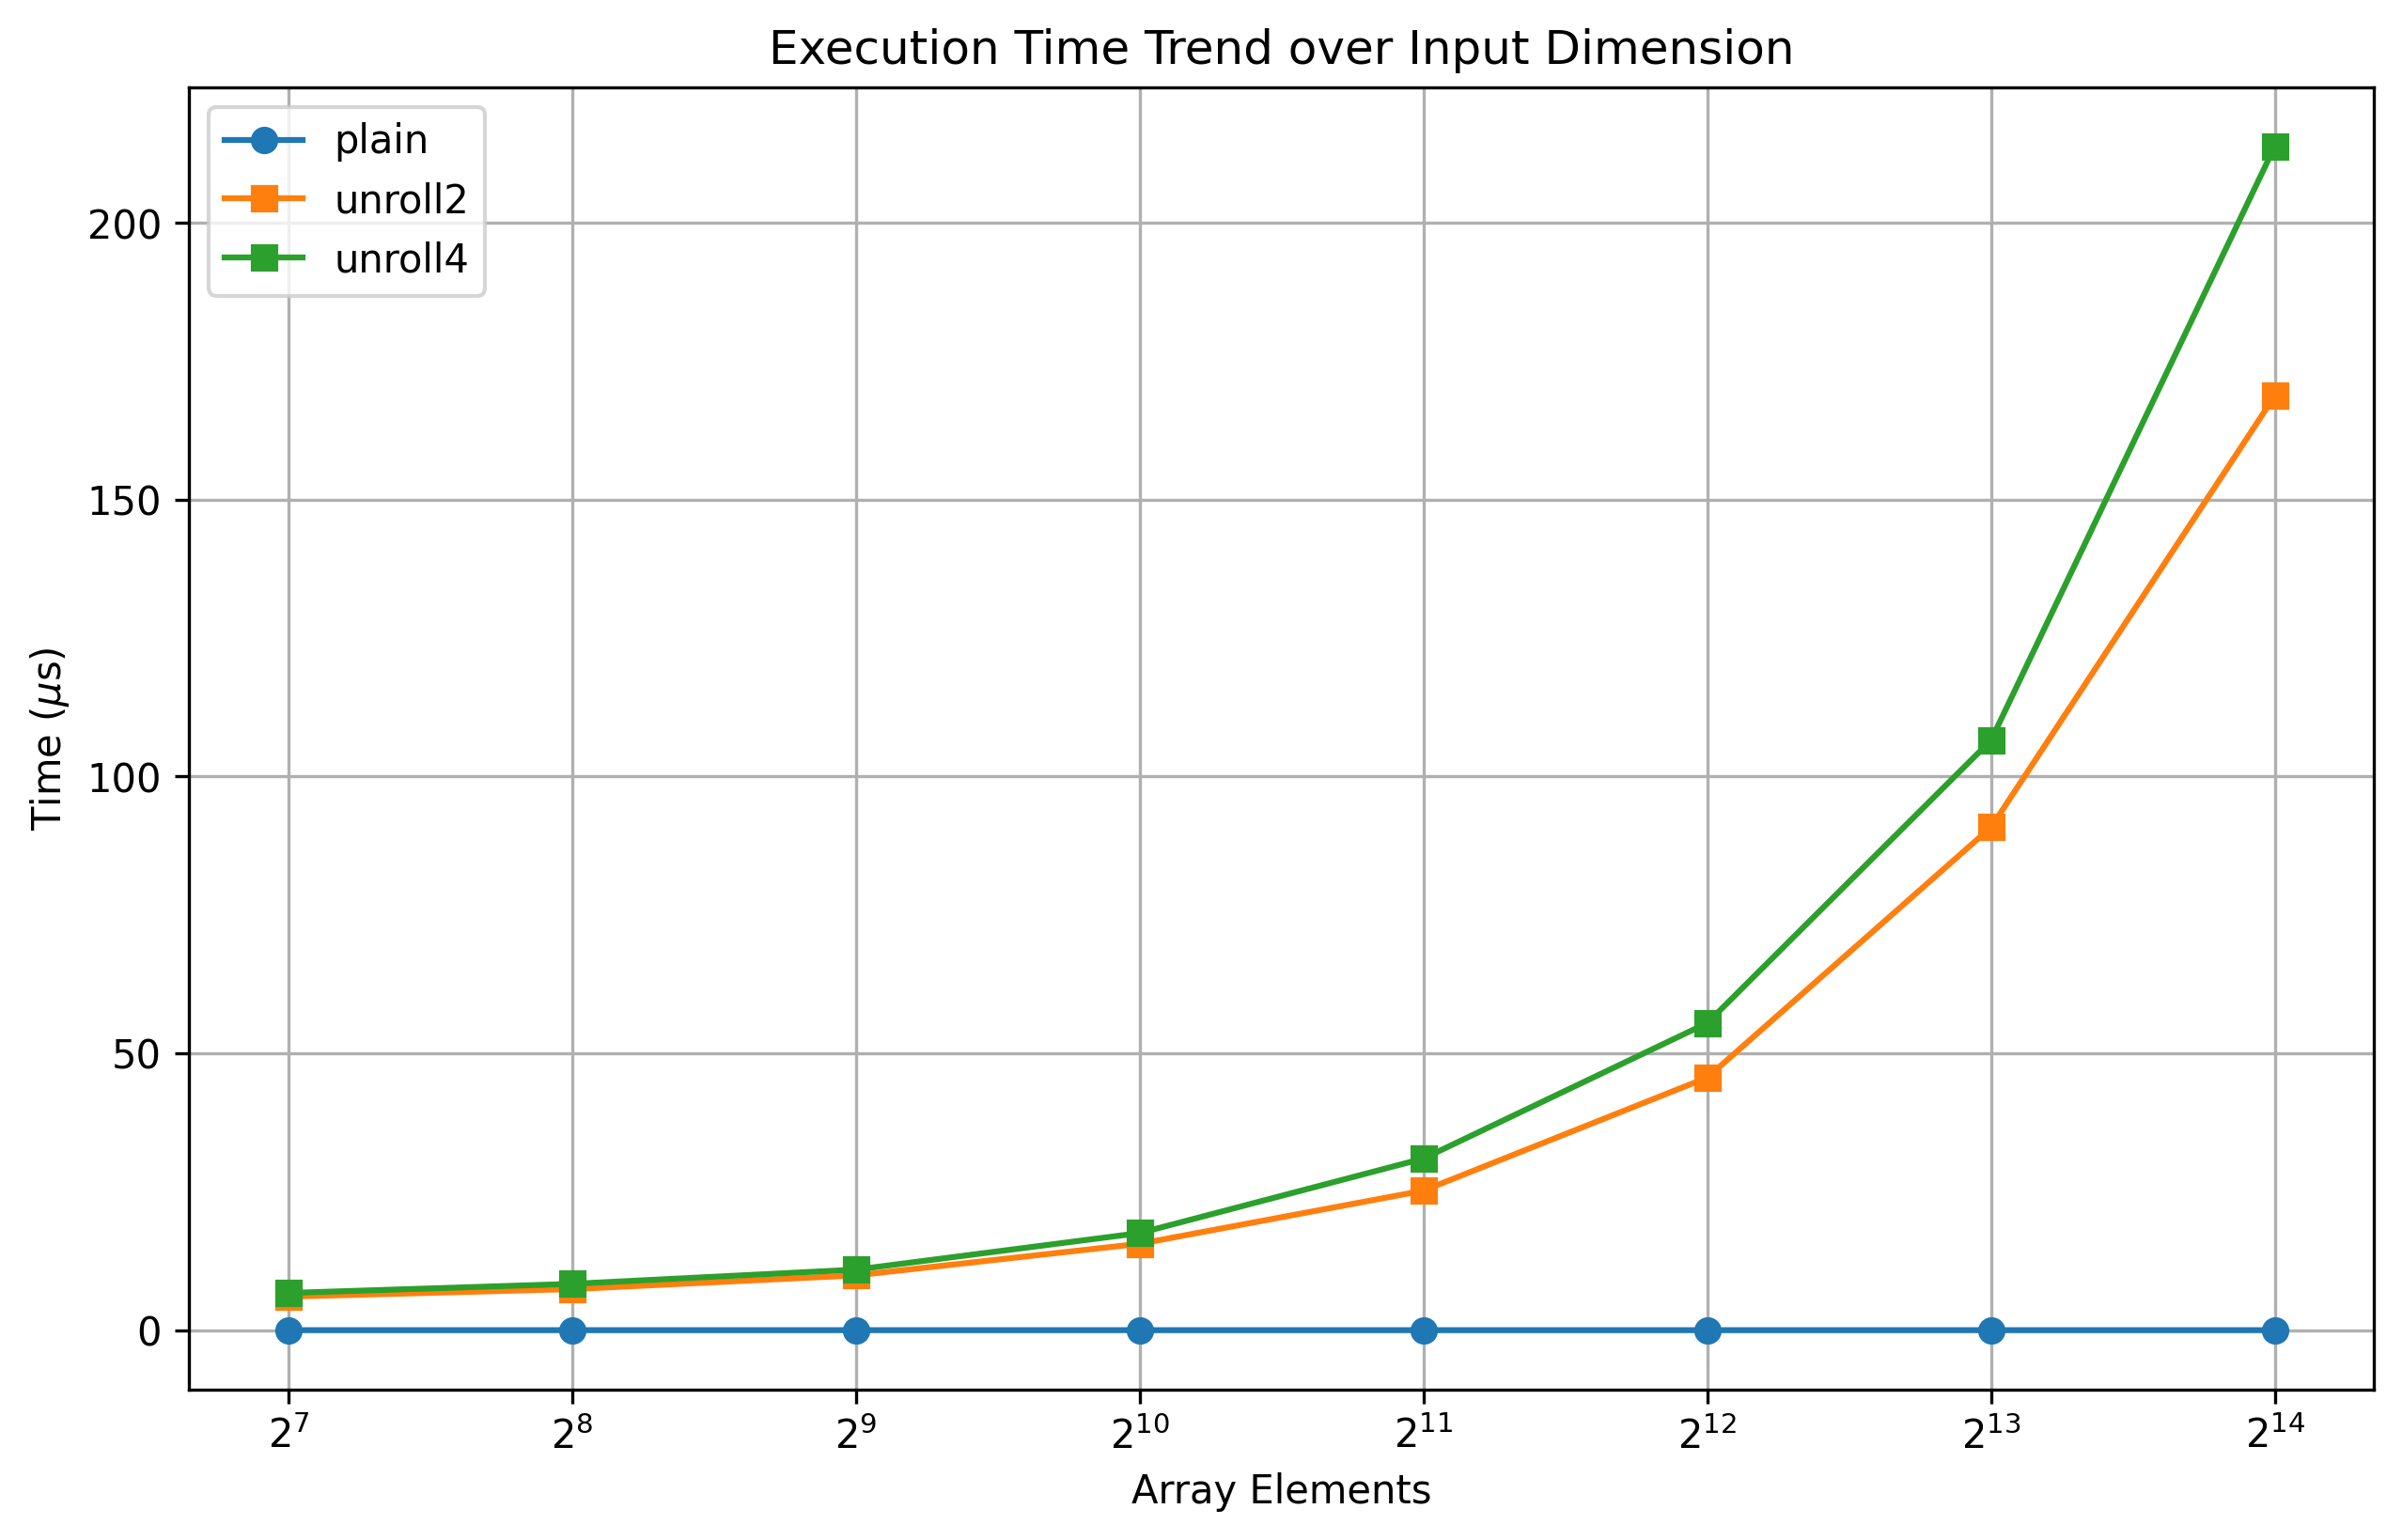

In [2]:
import matplotlib.pyplot as plt


def plot_time(df: pd.DataFrame):
    plt.figure(figsize=(10, 6), dpi=300)
    plt.title("Execution Time Trend over Input Dimension")

    plt.plot(df["elements"], df["plain"], marker="o", label="plain")
    plt.plot(df["elements"], df["unroll2"], marker="s", label="unroll2")
    plt.plot(df["elements"], df["unroll4"], marker="s", label="unroll4")

    plt.xlabel("Array Elements")
    plt.ylabel(r"Time ($\mu$s)")

    plt.xscale("log", base=2)
    plt.grid()
    plt.legend()
    plt.savefig("time.svg")
    plt.show()


plot_time(df)

In [3]:
df["unroll2_speedup"] = df["plain"] / df["unroll2"]
df["unroll4_speedup"] = df["plain"] / df["unroll4"]
df

,elements,plain,unroll2,unroll4,unroll2_speedup,unroll4_speedup
0,128,0.000006,6.05886,6.71774,0.000001,9.527996e-07
1,256,0.000008,7.41744,8.36120,0.000001,9.796584e-07
2,512,0.000011,9.89620,10.93750,0.000001,1.029915e-06
3,1024,0.000019,15.60590,17.54190,0.000001,1.063363e-06
4,2048,0.000031,25.20450,31.00870,0.000001,1.010732e-06
5,4096,0.000059,45.62960,55.47840,0.000001,1.056431e-06
6,8192,0.000111,90.83150,106.55700,0.000001,1.041536e-06
7,16384,0.000221,168.76400,213.85100,0.000001,1.032242e-06


In [4]:
print(
    df[["elements", "plain", "unroll2", "unroll4"]].to_latex(
        header=True, index=False, float_format="%.4f"
    )
)

\begin{tabular}{rrrr}
\toprule
elements & plain & unroll2 & unroll4 \\
\midrule
128 & 0.0000 & 6.0589 & 6.7177 \\
256 & 0.0000 & 7.4174 & 8.3612 \\
512 & 0.0000 & 9.8962 & 10.9375 \\
1024 & 0.0000 & 15.6059 & 17.5419 \\
2048 & 0.0000 & 25.2045 & 31.0087 \\
4096 & 0.0001 & 45.6296 & 55.4784 \\
8192 & 0.0001 & 90.8315 & 106.5570 \\
16384 & 0.0002 & 168.7640 & 213.8510 \\
\bottomrule
\end{tabular}



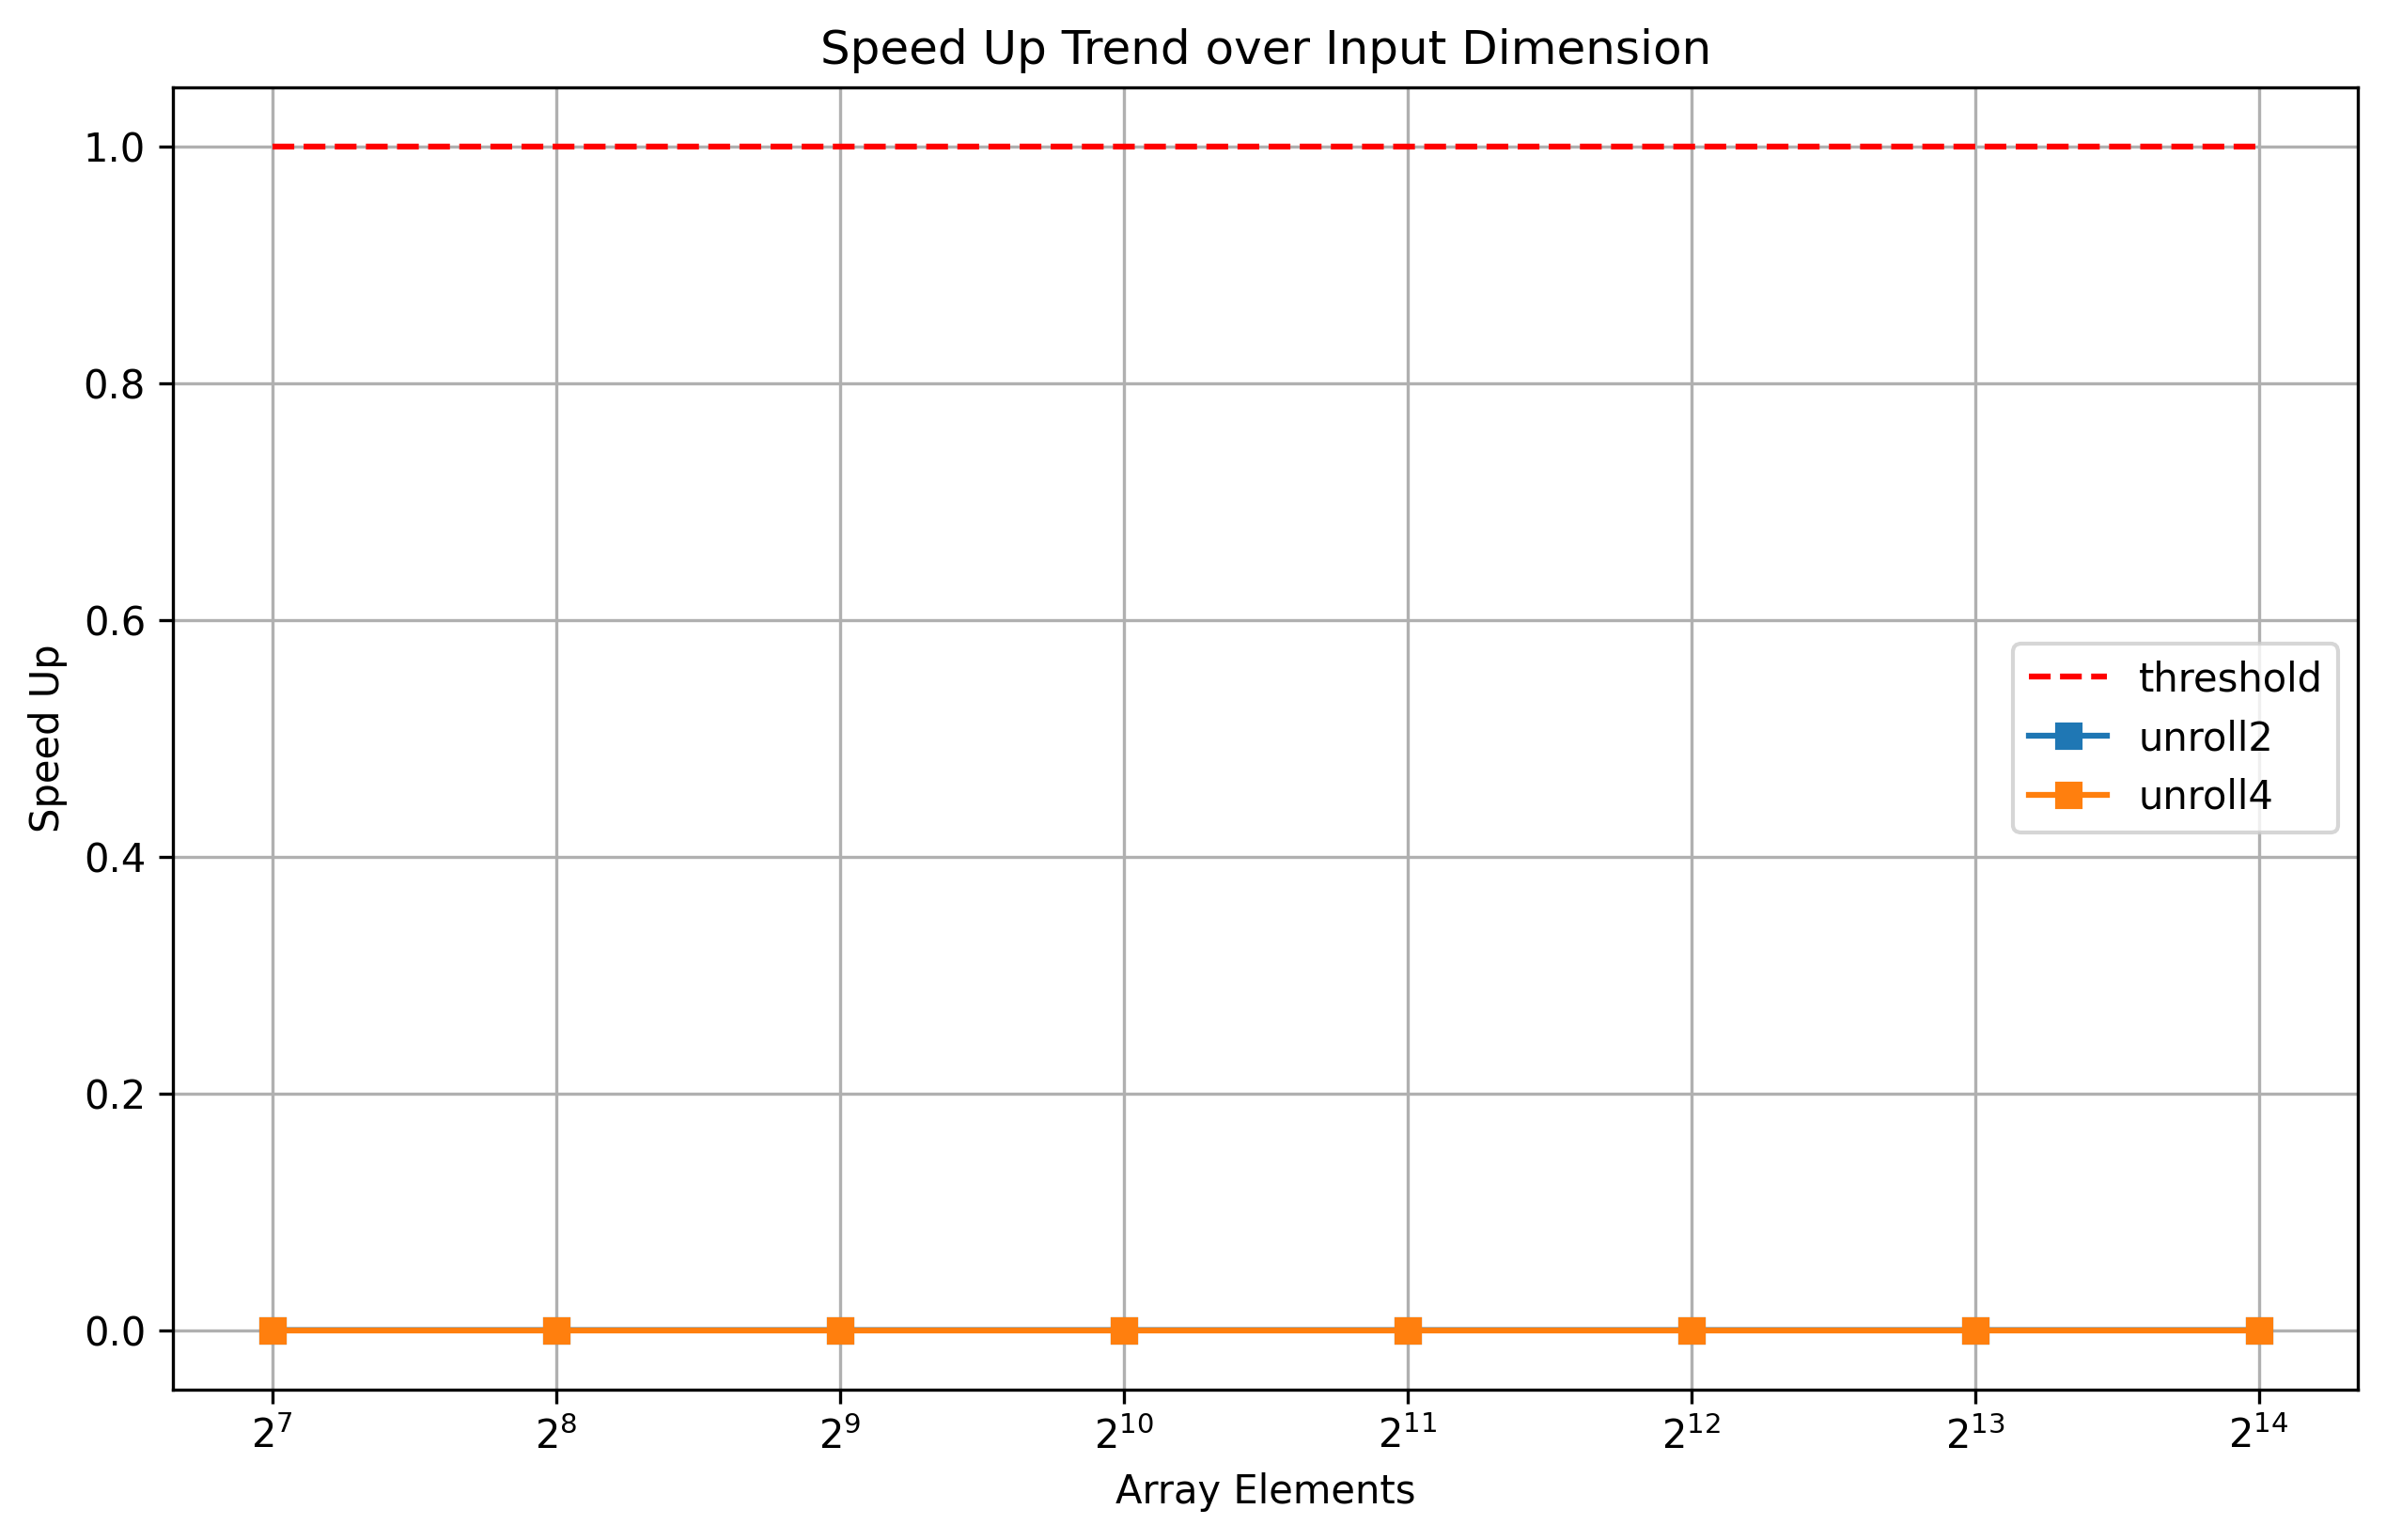

In [5]:
def plot_speedup(df: pd.DataFrame):
    plt.figure(figsize=(10, 6), dpi=300)
    plt.title("Speed Up Trend over Input Dimension")

    # threshold of good speed up
    plt.plot([128, 16384], [1.0, 1.0], "r--", label="threshold")

    plt.plot(df["elements"], df["unroll2_speedup"], marker="s", label="unroll2")
    plt.plot(df["elements"], df["unroll4_speedup"], marker="s", label="unroll4")

    plt.xlabel("Array Elements")
    plt.ylabel(r"Speed Up")

    plt.xscale("log", base=2)
    plt.grid()
    plt.legend()
    plt.savefig("speed_up.svg")
    plt.show()


plot_speedup(df)

In [6]:
plain = pd.read_csv("plainopt3.csv")
unroll2 = pd.read_csv("unroll2opt3.csv")
unroll4 = pd.read_csv("unroll4opt3.csv")
df = plain
df.rename(columns={"time": "plain"}, inplace=True)
df["plain"] = df["plain"] * 1e6
df["unroll2"] = unroll2["time"] * 1e6
df["unroll4"] = unroll4["time"] * 1e6
df

,elements,plain,unroll2,unroll4
0,128,6.00344,6.03336,6.03360
1,256,7.98740,7.53806,7.22336
2,512,10.61620,10.04370,10.02360
3,1024,16.07940,16.34610,16.52390
4,2048,27.79440,25.88160,24.75510
5,4096,50.27250,47.17530,46.19030
6,8192,98.52080,88.05170,85.54590
7,16384,187.99200,174.82300,172.69600


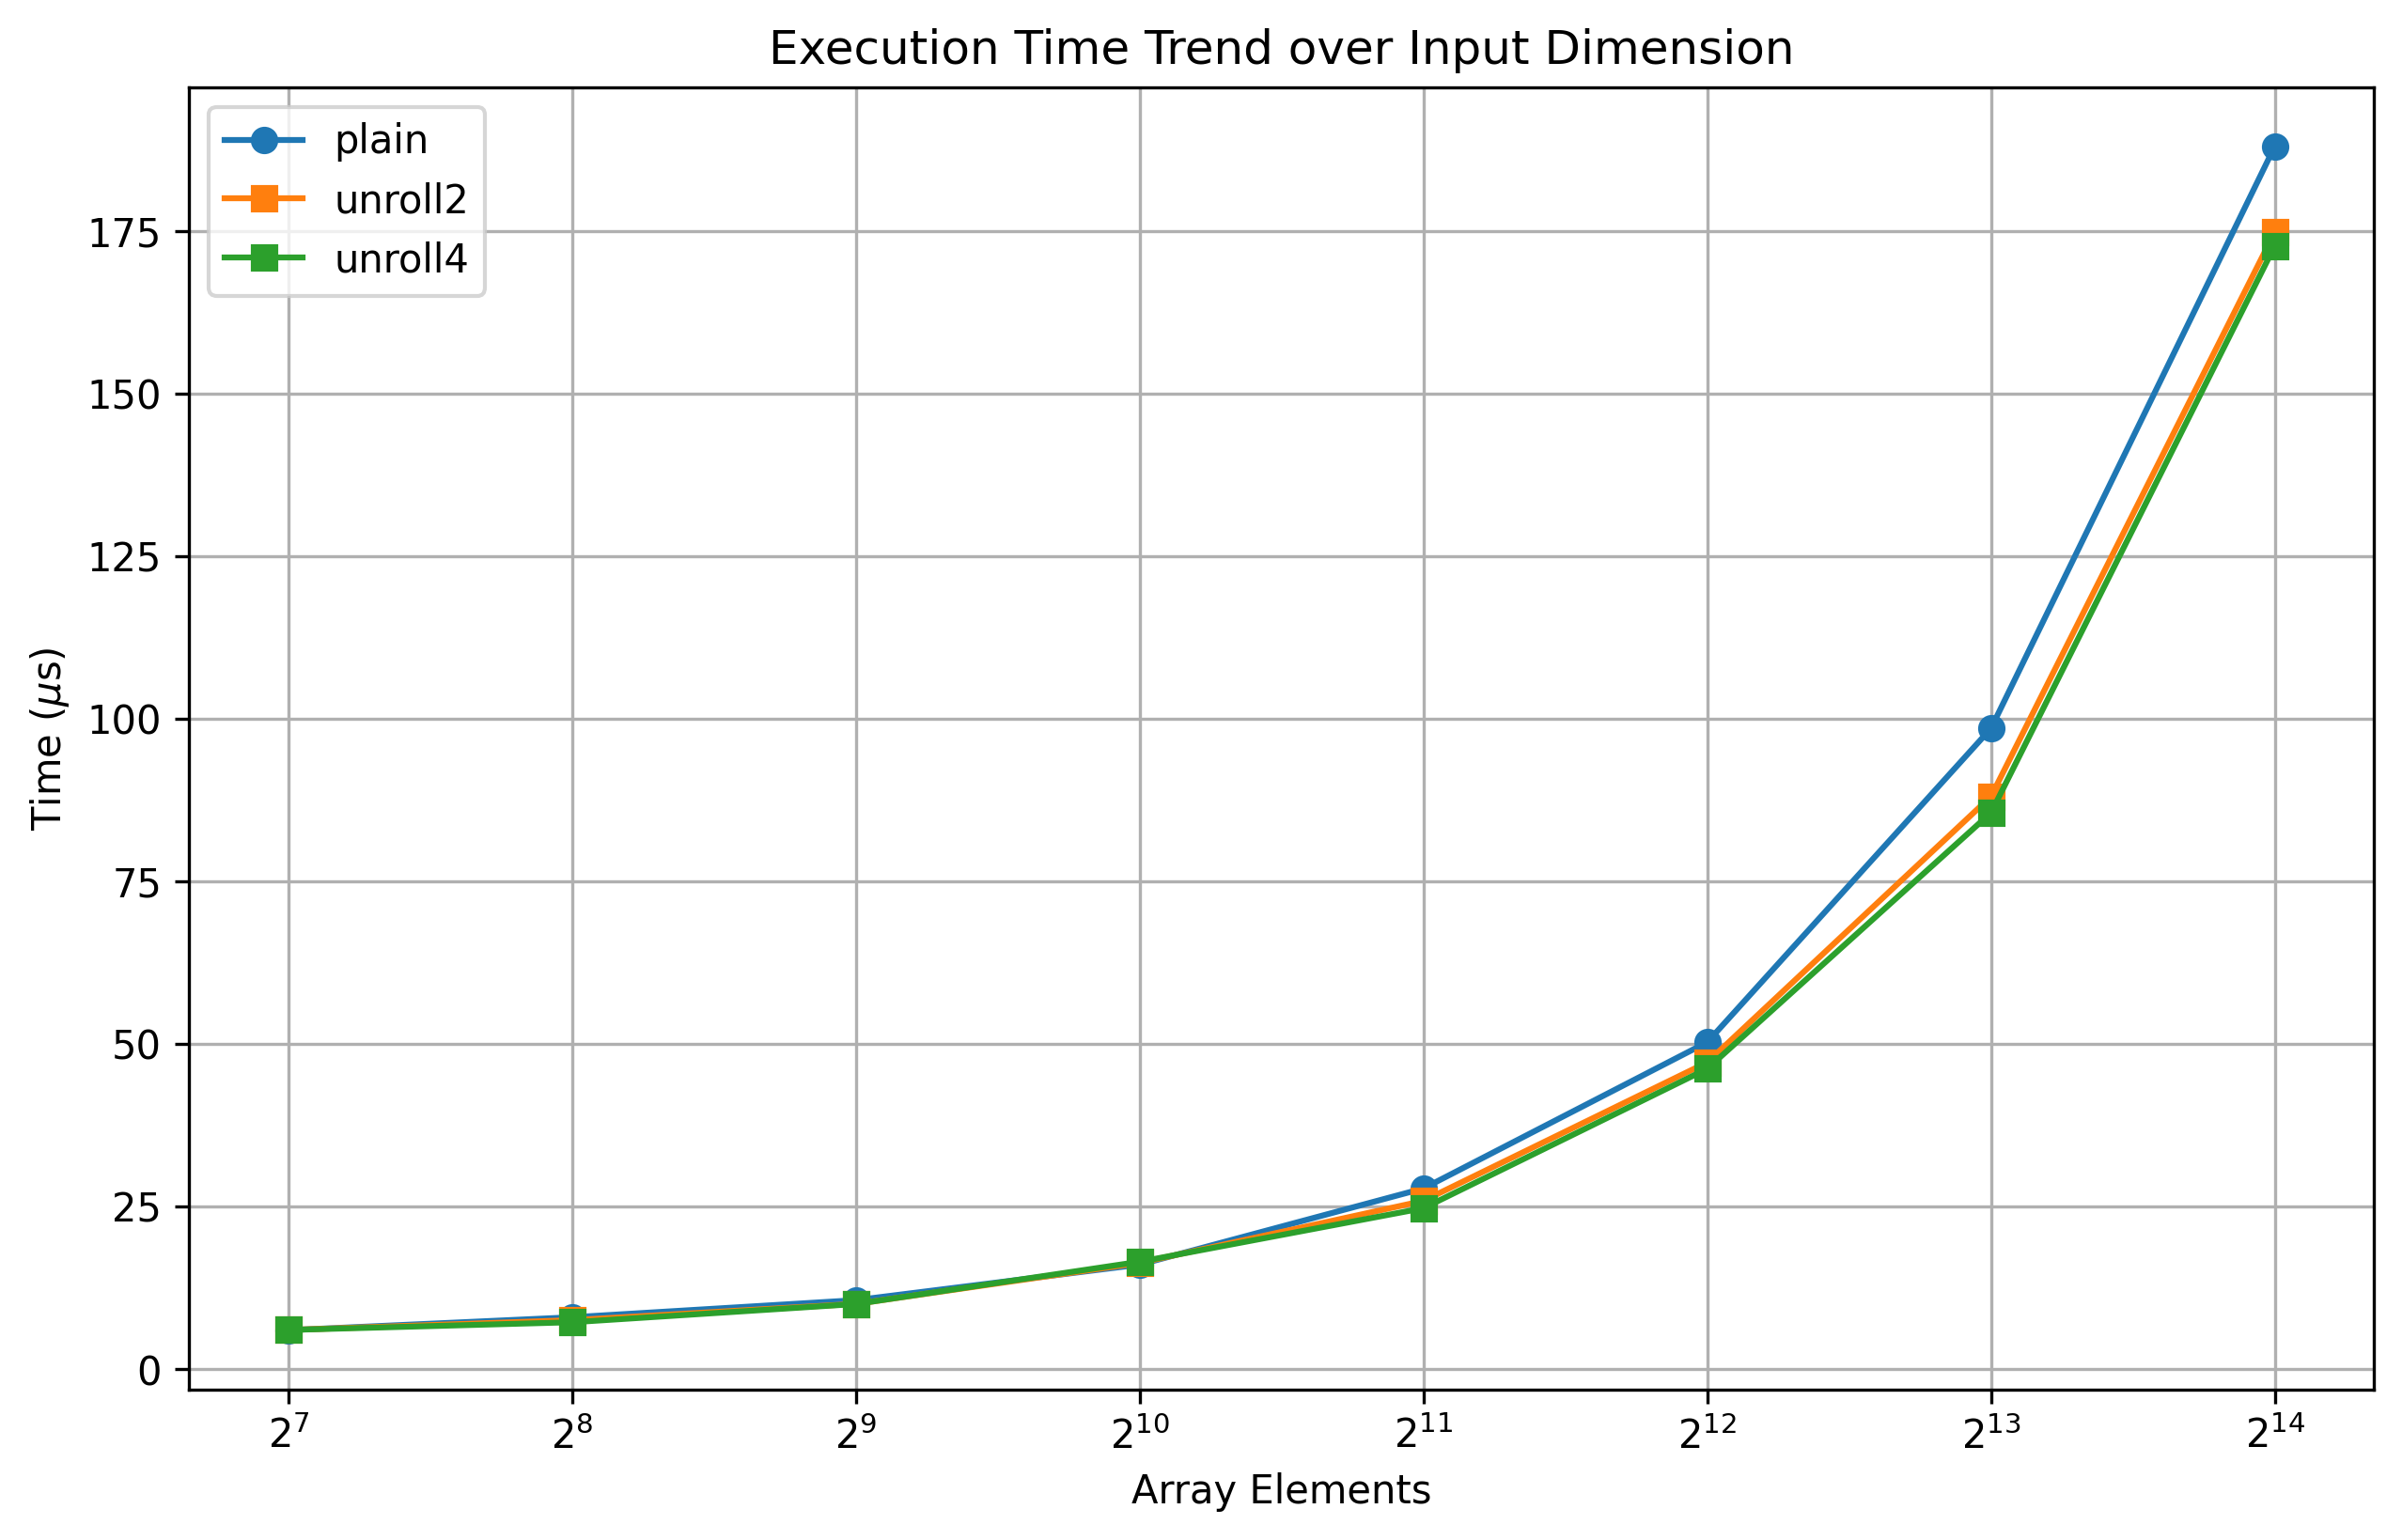

In [7]:
plot_time(df)

In [8]:
df["unroll2_speedup"] = df["plain"] / df["unroll2"]
df["unroll4_speedup"] = df["plain"] / df["unroll4"]
df

,elements,plain,unroll2,unroll4,unroll2_speedup,unroll4_speedup
0,128,6.00344,6.03336,6.03360,0.995041,0.995001
1,256,7.98740,7.53806,7.22336,1.059610,1.105773
2,512,10.61620,10.04370,10.02360,1.057001,1.059120
3,1024,16.07940,16.34610,16.52390,0.983684,0.973100
4,2048,27.79440,25.88160,24.75510,1.073906,1.122775
5,4096,50.27250,47.17530,46.19030,1.065653,1.088378
6,8192,98.52080,88.05170,85.54590,1.118897,1.151672
7,16384,187.99200,174.82300,172.69600,1.075328,1.088572


In [9]:
print(
    df[["elements", "plain", "unroll2", "unroll4"]].to_latex(
        header=True, index=False, float_format="%.4f"
    )
)

\begin{tabular}{rrrr}
\toprule
elements & plain & unroll2 & unroll4 \\
\midrule
128 & 6.0034 & 6.0334 & 6.0336 \\
256 & 7.9874 & 7.5381 & 7.2234 \\
512 & 10.6162 & 10.0437 & 10.0236 \\
1024 & 16.0794 & 16.3461 & 16.5239 \\
2048 & 27.7944 & 25.8816 & 24.7551 \\
4096 & 50.2725 & 47.1753 & 46.1903 \\
8192 & 98.5208 & 88.0517 & 85.5459 \\
16384 & 187.9920 & 174.8230 & 172.6960 \\
\bottomrule
\end{tabular}



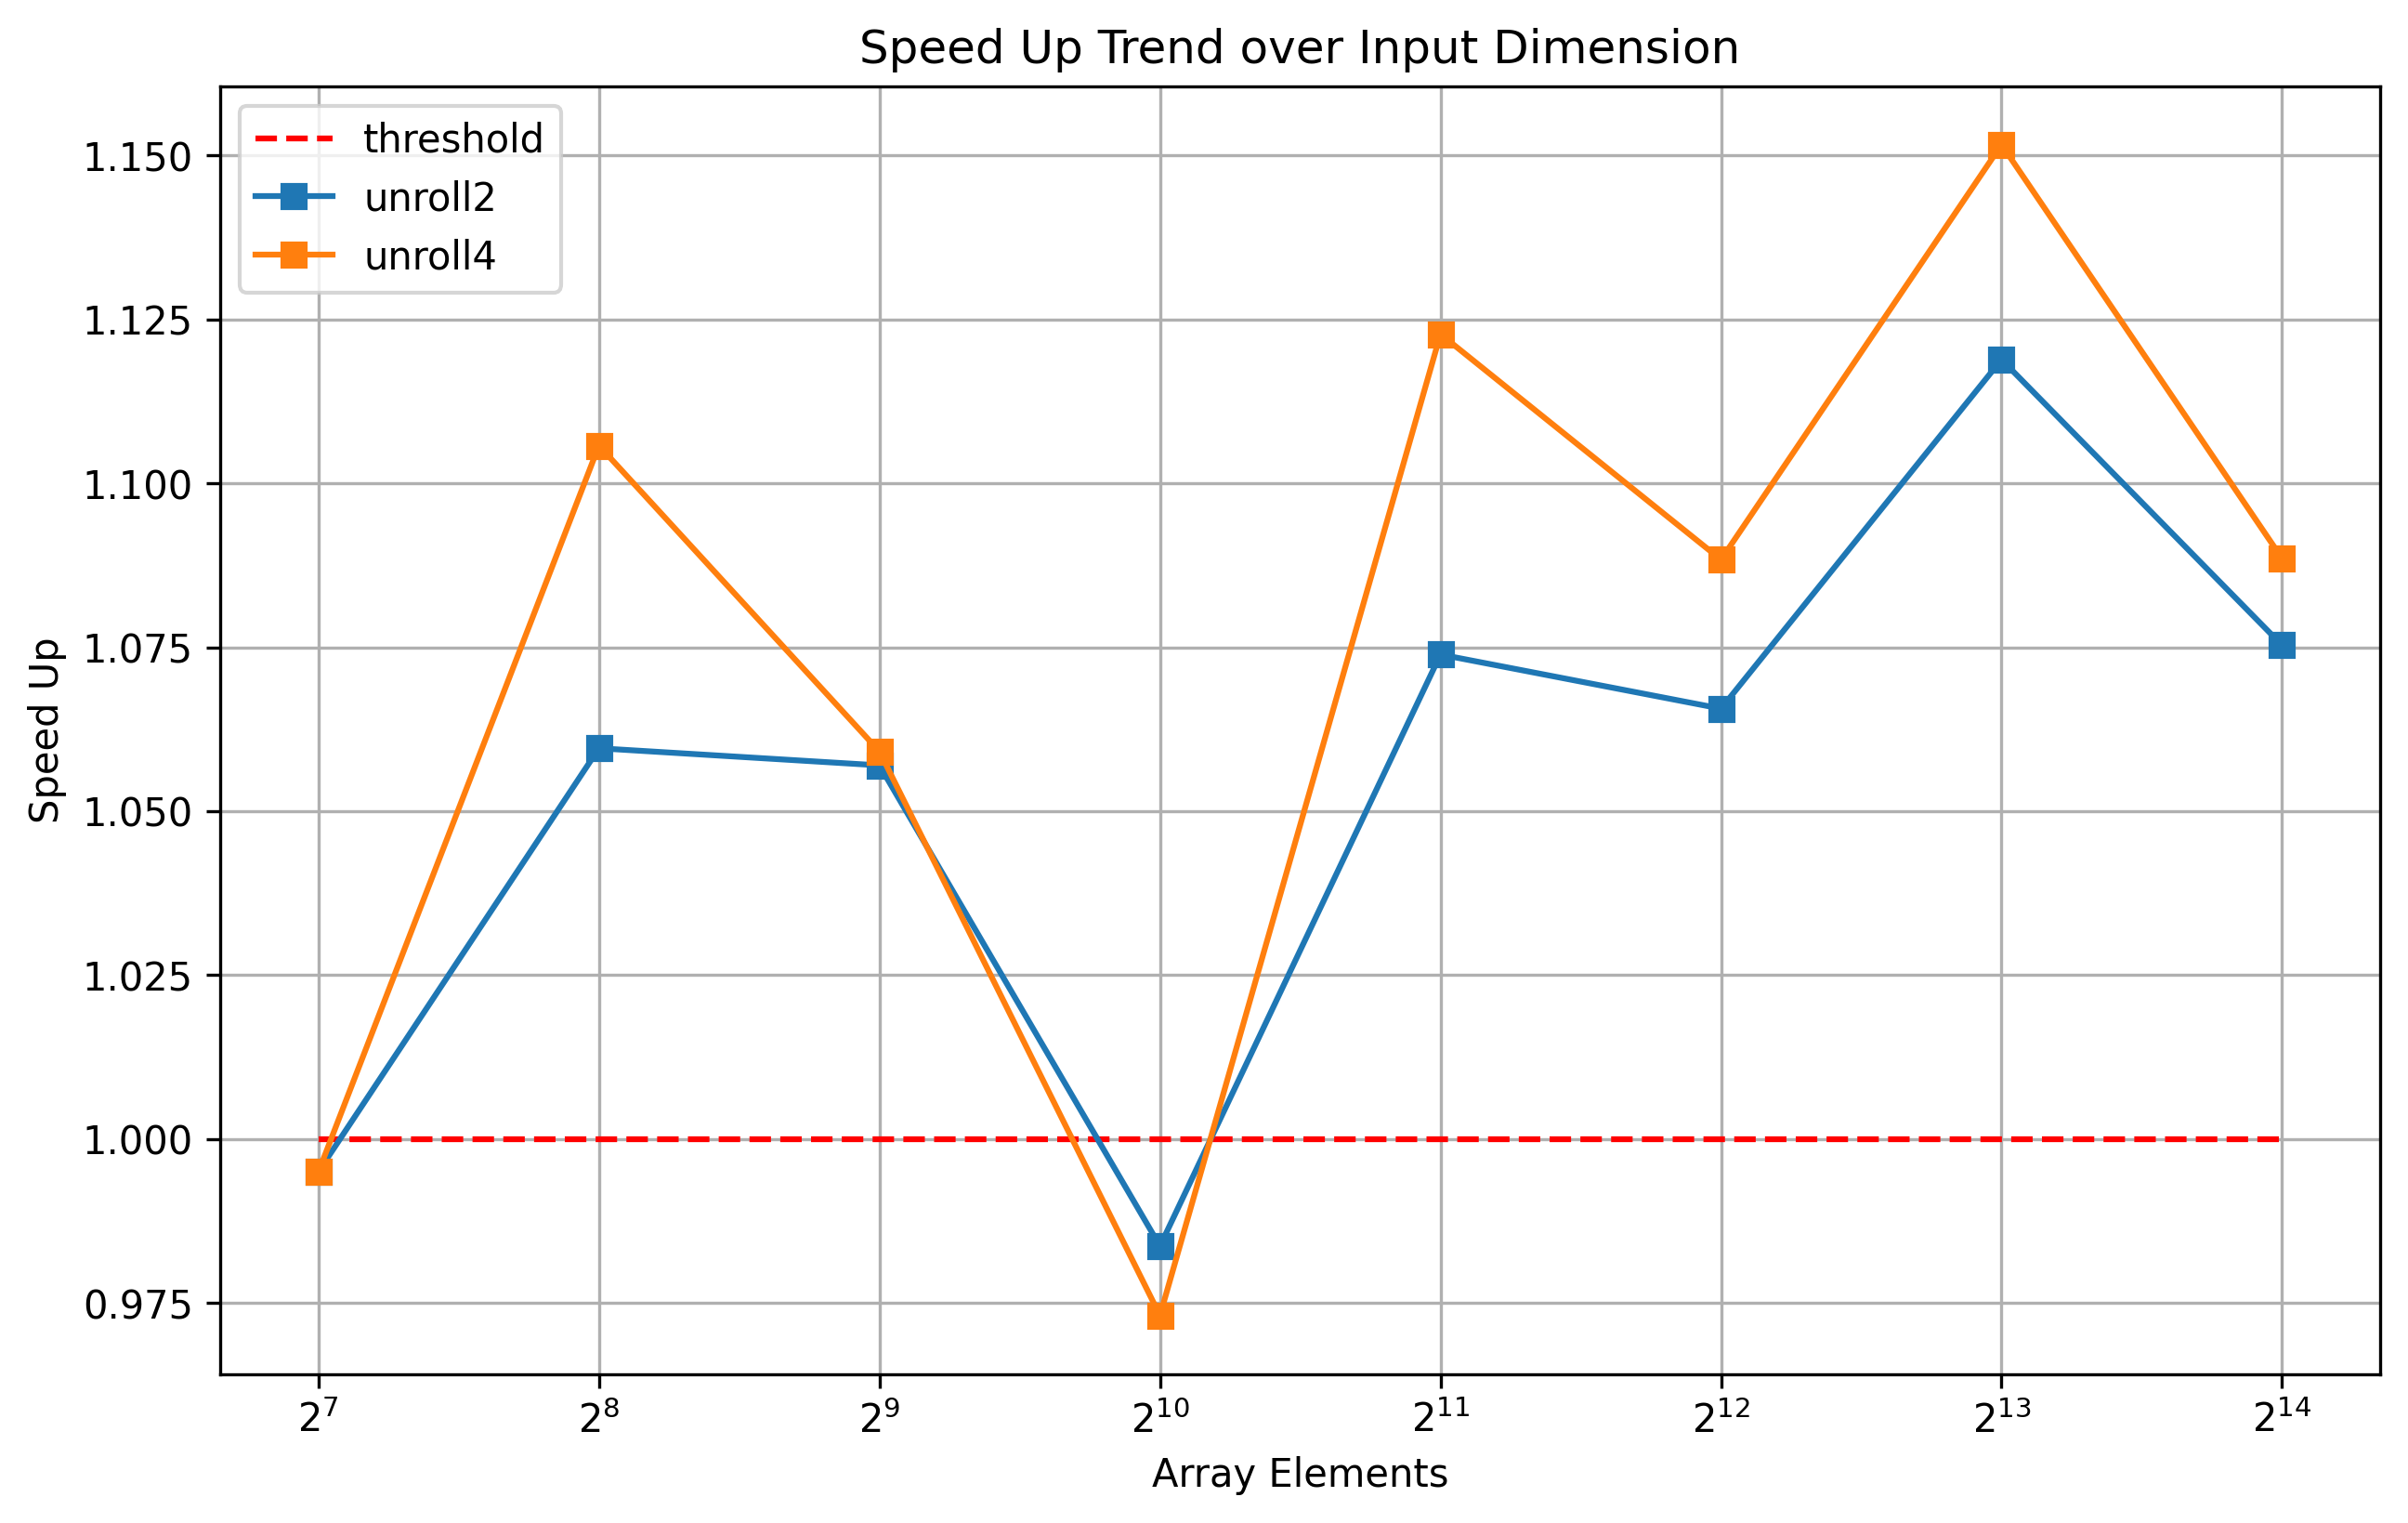

In [10]:
plot_speedup(df)

In [11]:
plain = pd.read_csv("plainopt3.csv")
unroll2 = pd.read_csv("unroll2fastmath.csv")
unroll4 = pd.read_csv("unroll4fastmath.csv")
df = plain
df.rename(columns={"time": "plain"}, inplace=True)
df["plain"] = df["plain"] * 1e6
df["unroll2"] = unroll2["time"] * 1e6
df["unroll4"] = unroll4["time"] * 1e6
df

,elements,plain,unroll2,unroll4
0,128,6.00344,6.15224,5.48364
1,256,7.98740,7.41988,8.01912
2,512,10.61620,10.47690,8.88750
3,1024,16.07940,12.70190,10.49040
4,2048,27.79440,17.39870,15.75510
5,4096,50.27250,26.77220,23.54950
6,8192,98.52080,42.40090,36.03470
7,16384,187.99200,74.91480,67.28190


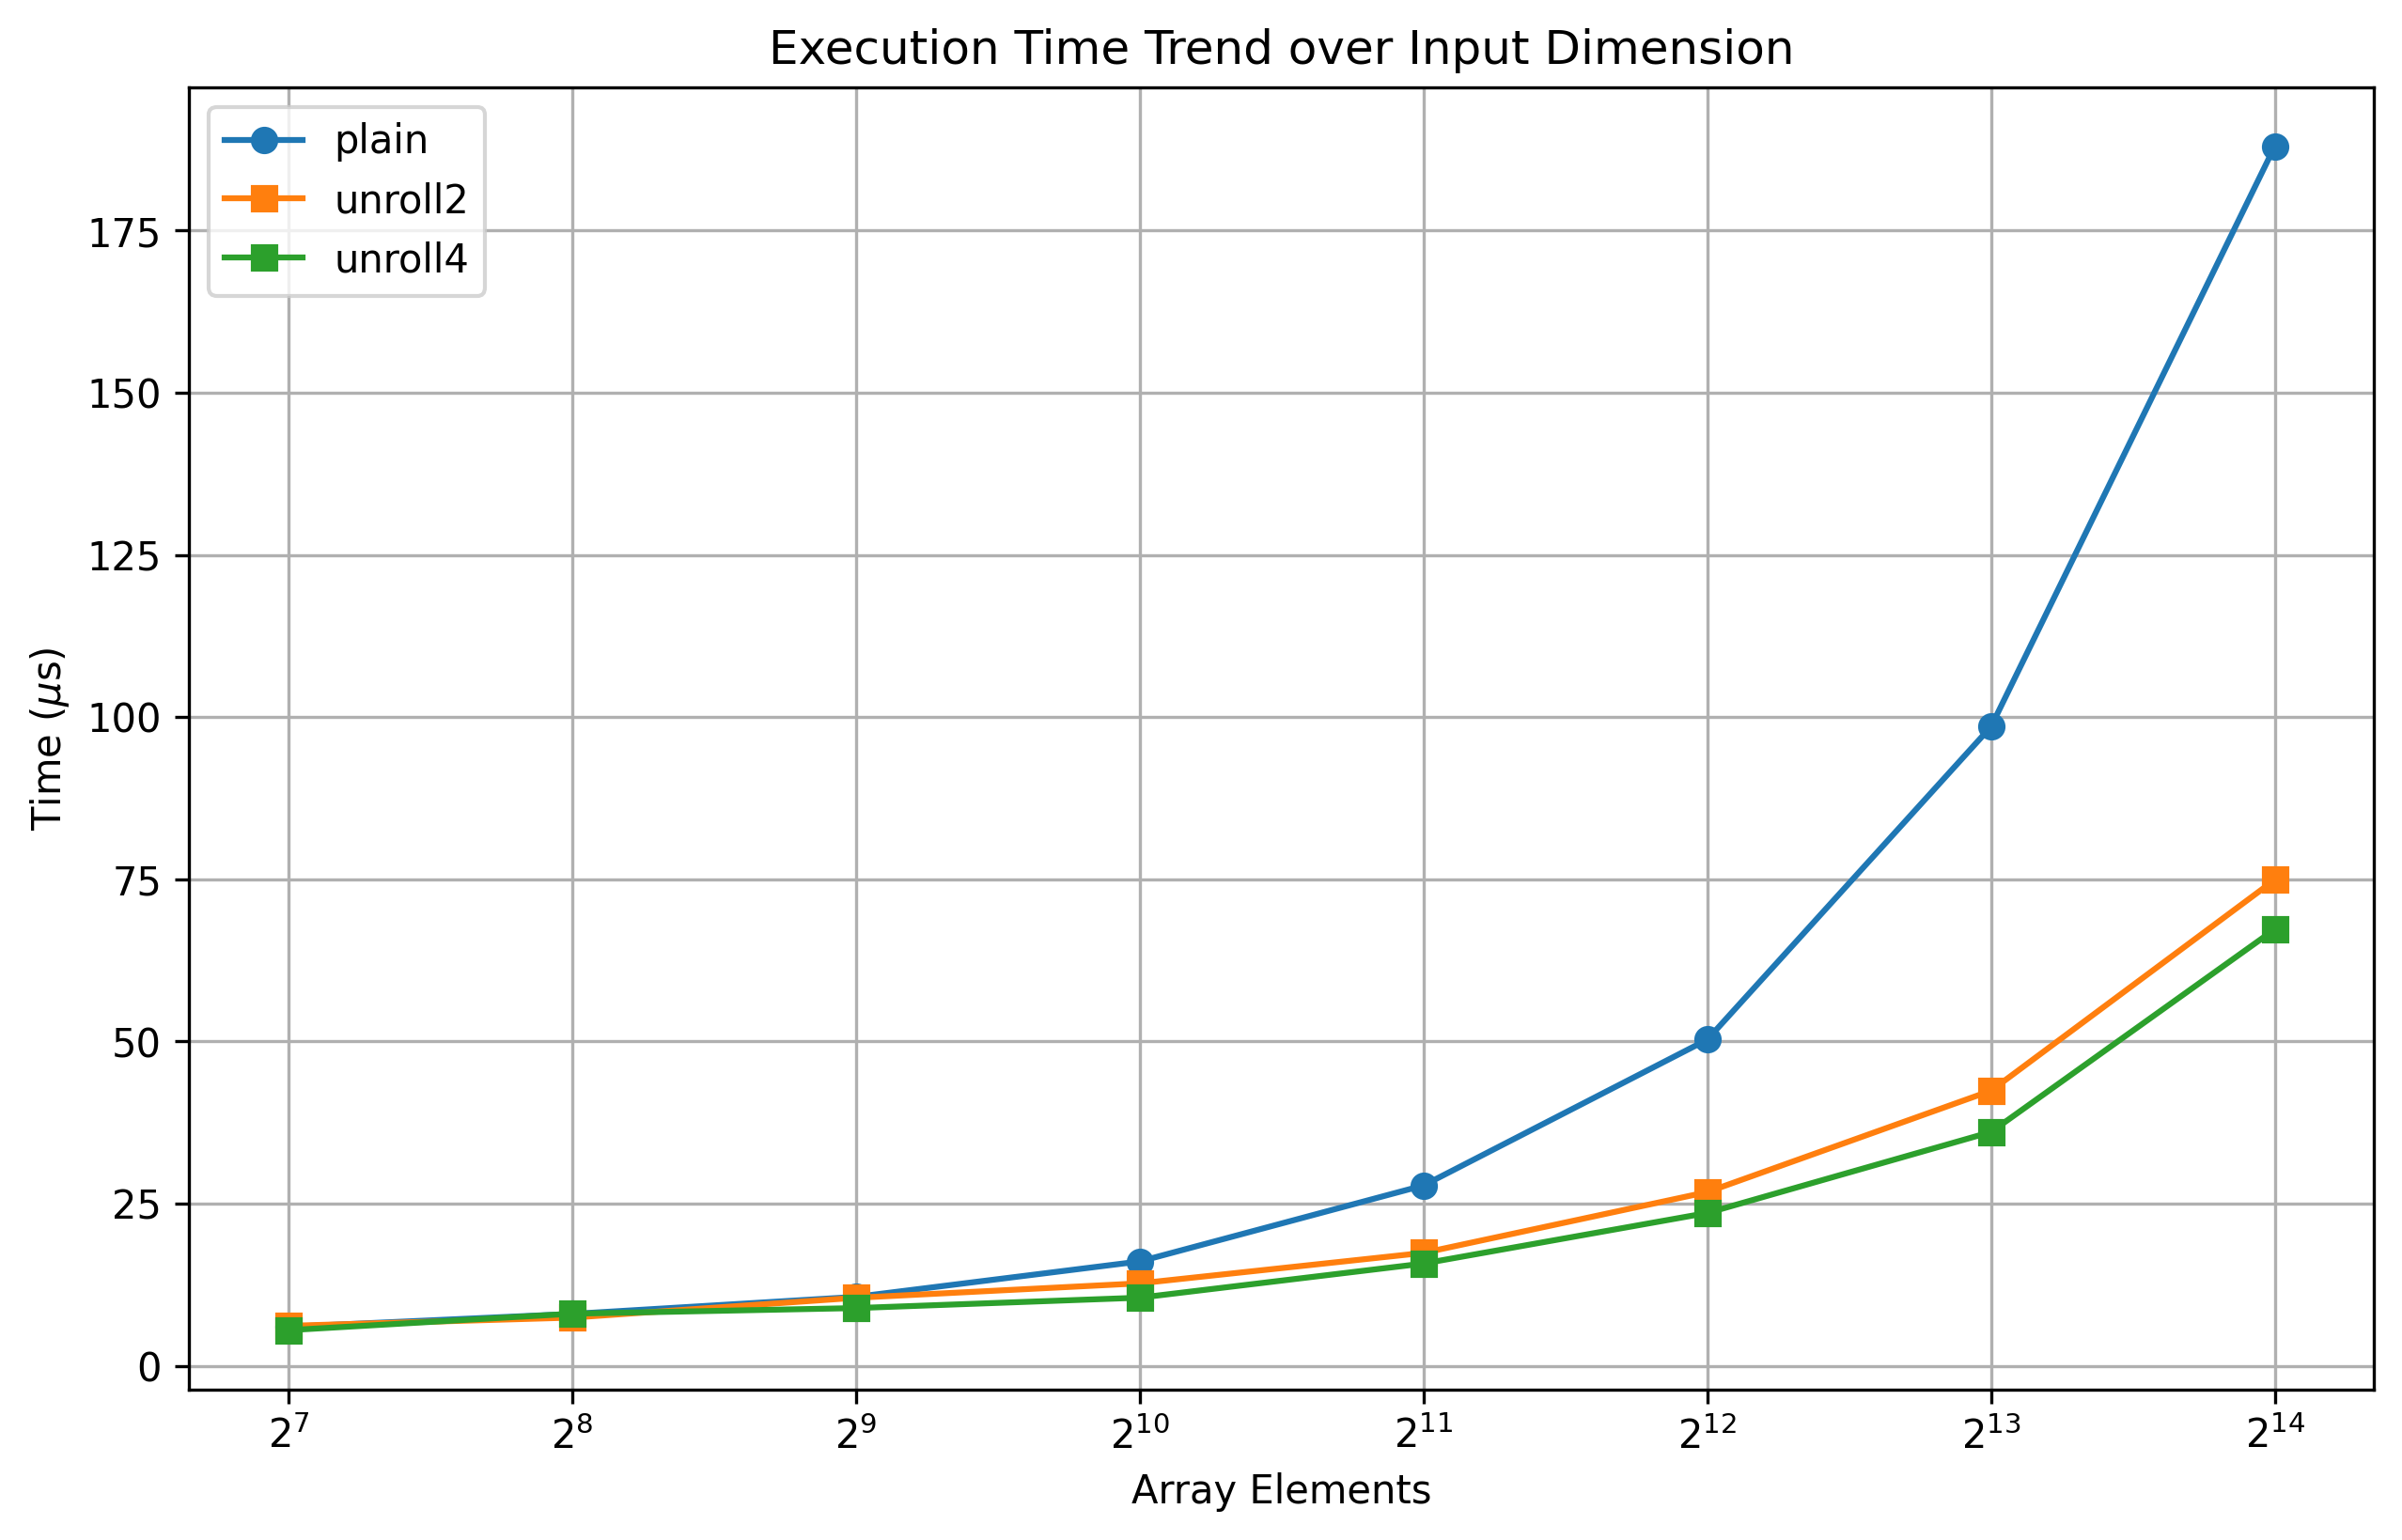

In [12]:
plot_time(df)

In [13]:
df["unroll2_speedup"] = df["plain"] / df["unroll2"]
df["unroll4_speedup"] = df["plain"] / df["unroll4"]
df

,elements,plain,unroll2,unroll4,unroll2_speedup,unroll4_speedup
0,128,6.00344,6.15224,5.48364,0.975814,1.094791
1,256,7.98740,7.41988,8.01912,1.076486,0.996044
2,512,10.61620,10.47690,8.88750,1.013296,1.194509
3,1024,16.07940,12.70190,10.49040,1.265905,1.532773
4,2048,27.79440,17.39870,15.75510,1.597499,1.764153
5,4096,50.27250,26.77220,23.54950,1.877787,2.134759
6,8192,98.52080,42.40090,36.03470,2.323554,2.734054
7,16384,187.99200,74.91480,67.28190,2.509411,2.794095


In [14]:
print(
    df[["elements", "plain", "unroll2", "unroll4"]].to_latex(
        header=True, index=False, float_format="%.4f"
    )
)

\begin{tabular}{rrrr}
\toprule
elements & plain & unroll2 & unroll4 \\
\midrule
128 & 6.0034 & 6.1522 & 5.4836 \\
256 & 7.9874 & 7.4199 & 8.0191 \\
512 & 10.6162 & 10.4769 & 8.8875 \\
1024 & 16.0794 & 12.7019 & 10.4904 \\
2048 & 27.7944 & 17.3987 & 15.7551 \\
4096 & 50.2725 & 26.7722 & 23.5495 \\
8192 & 98.5208 & 42.4009 & 36.0347 \\
16384 & 187.9920 & 74.9148 & 67.2819 \\
\bottomrule
\end{tabular}



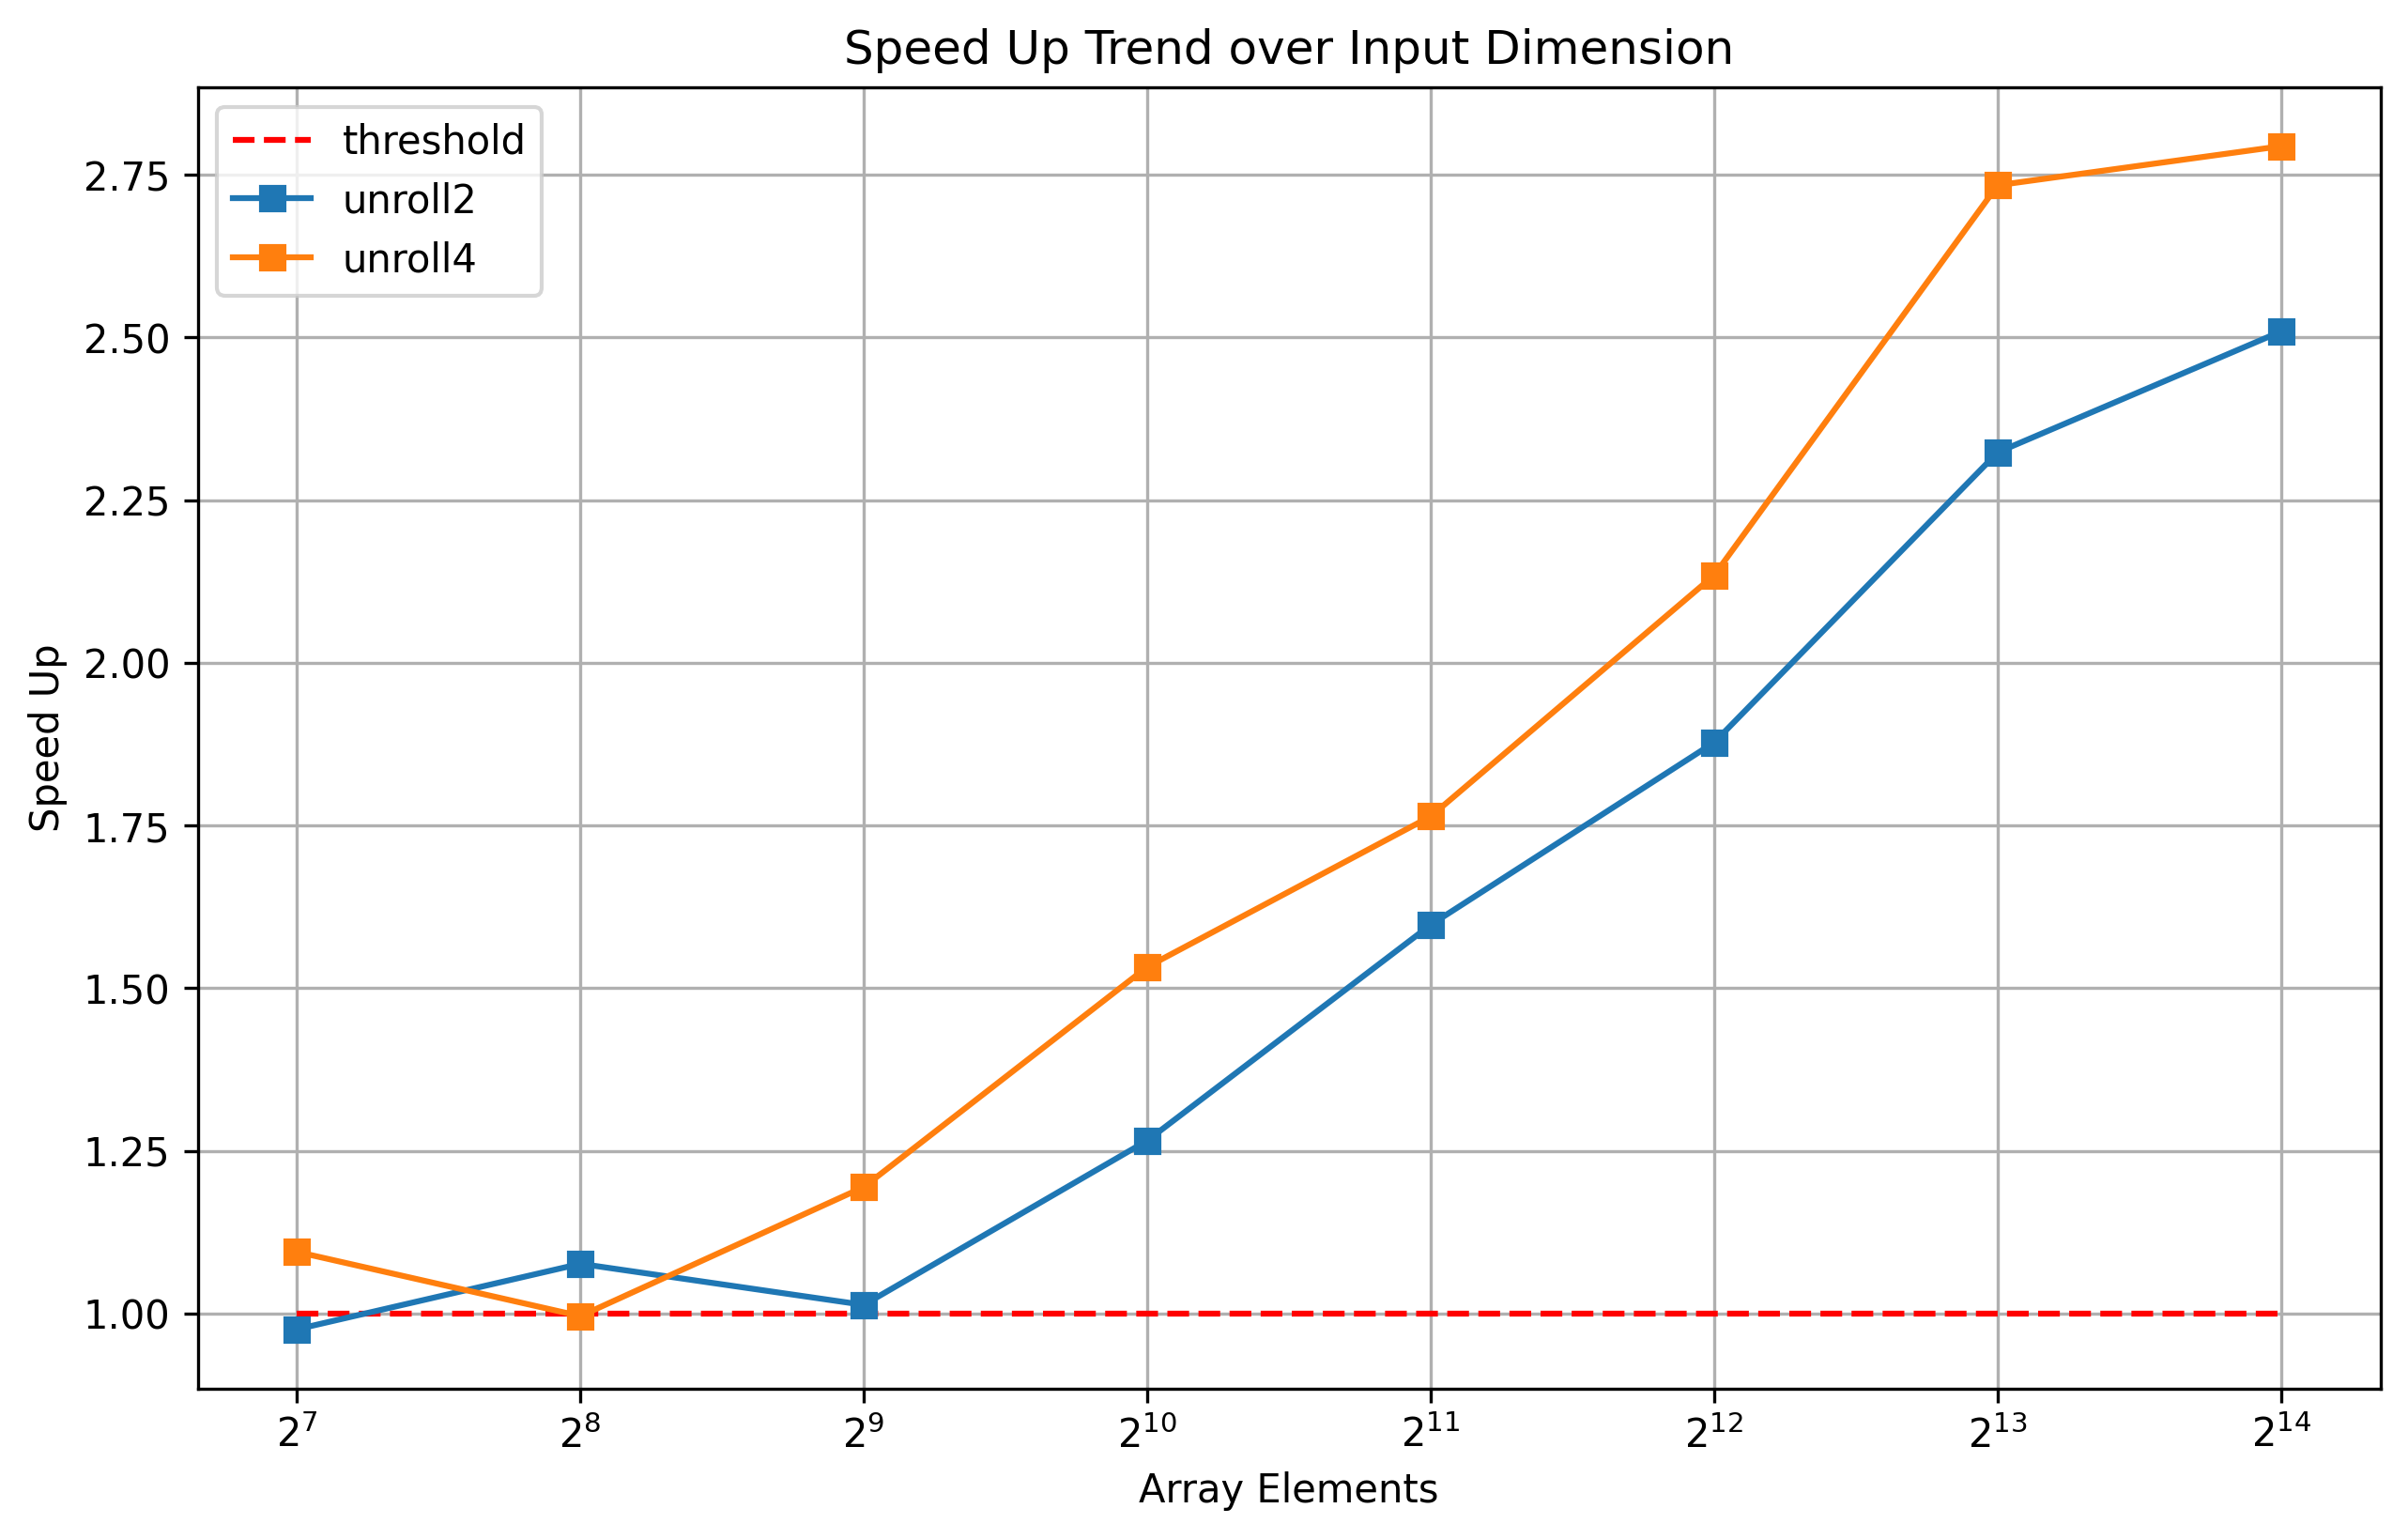

In [15]:
plot_speedup(df)